In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

import cv2
from cv2 import dnn_superres
sr = dnn_superres.DnnSuperResImpl_create()


104.48184


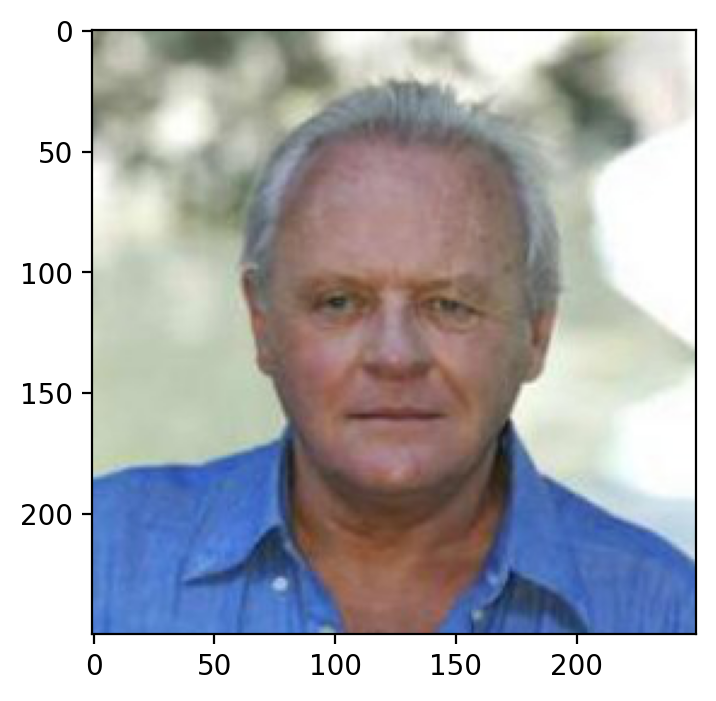

In [2]:

im = plt.imread("lfw/Anthony_Hopkins/Anthony_Hopkins_0002.jpg")
plt.imshow(im)
# im = im.flatten()

A = plt.imread("lfw/Lindsey_Graham/Lindsey_Graham_0002.jpg")
B = plt.imread("lfw/Lindsey_Graham/Lindsey_Graham_0001.jpg")

mse = ((A - B)**2).mean(axis=None)
 
    
print (mse)
        

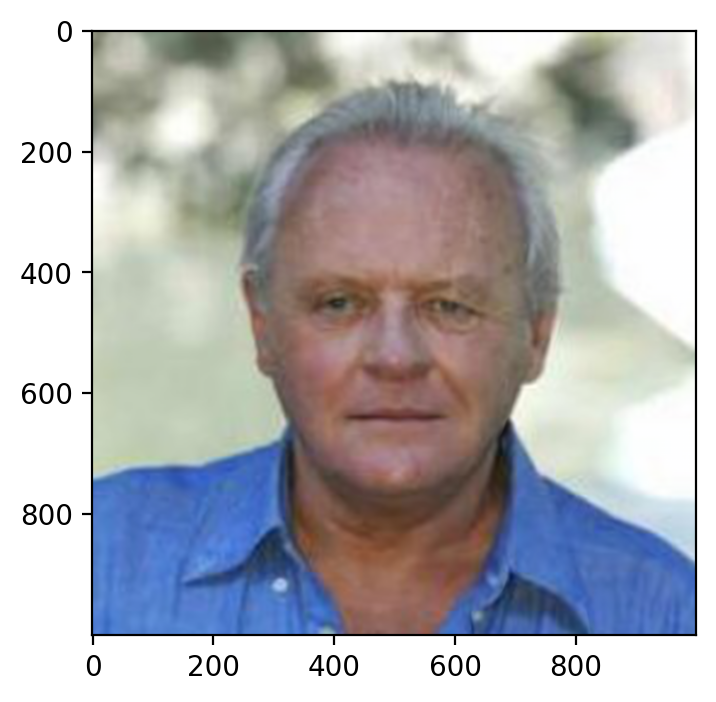

In [4]:


image = cv2.imread('lfw/Anthony_Hopkins/Anthony_Hopkins_0002.jpg')


def doit(image):
    path = "EDSR_x4.pb"
    sr.readModel(path)
    sr.setModel("edsr", 4)
    result = sr.upsample(image)
    
    return result

res = doit(image)
im_rgb = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)


# result = doit(res)
# im_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
# plt.imshow(im_rgb)

# cv2.imwrite("./upscaled.png", result)

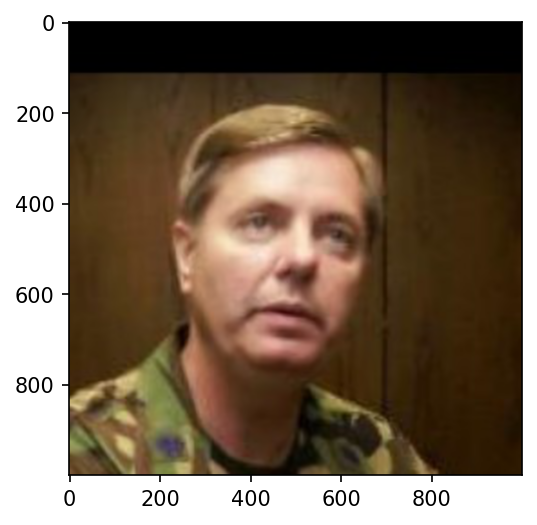

In [12]:
plt.imshow(im_rgb)

In [5]:
def intropolate(im_rgb):
    r,c, d = im_rgb.shape

    up_img = np.zeros((r*2-1, c*2-1, d))

    for i in range(r):
        for j in range(c):
            up_img[i*2][j*2] = im_rgb[i][j]



    print (up_img.shape)
    rr, cc, dd = up_img.shape

    for i in range(rr):
        for j in range(cc):
            if i%2==1 and j%2==1:
                try:
                    up_img[i][j][0] = float(up_img[i-1][j-1][0] + up_img[i+1][j-1][0] + up_img[i-1][j+1][0] + up_img[i+1][j+1][0])/4.
                    up_img[i][j][1] = float(up_img[i-1][j-1][1] + up_img[i+1][j-1][1] + up_img[i-1][j+1][1] + up_img[i+1][j+1][1])/4.
                    up_img[i][j][2] = float(up_img[i-1][j-1][2] + up_img[i+1][j-1][2] + up_img[i-1][j+1][2] + up_img[i+1][j+1][2])/4.
                except:
                    pass

    # up_img = up_img. astype(int)      
#     plt.imshow(im_rgb)
#     plt.show()

    for i in range(rr):
        for j in range(cc):
            if (i%2==0 and j%2) or (i%2 and j%2==0):
                try:
                    up_img[i][j][0] = float(up_img[i-1][j][0] + up_img[i+1][j][0] + up_img[i][j-1][0] + up_img[i][j+1][0])/4.
                    up_img[i][j][1] = float(up_img[i-1][j][1] + up_img[i+1][j][1] + up_img[i][j-1][1] + up_img[i][j+1][1])/4.
                    up_img[i][j][2] = float(up_img[i-1][j][2] + up_img[i+1][j][2] + up_img[i][j-1][2] + up_img[i][j+1][2])/4.
                except:
                    pass
    up_img = up_img[1:-1, 1:-1]
    up_img = up_img. astype(int)
    
    return up_img

(25, 25, 3)
(49, 49, 3)
(93, 93, 3)
(181, 181, 3)
(357, 357, 3)
(709, 709, 3)


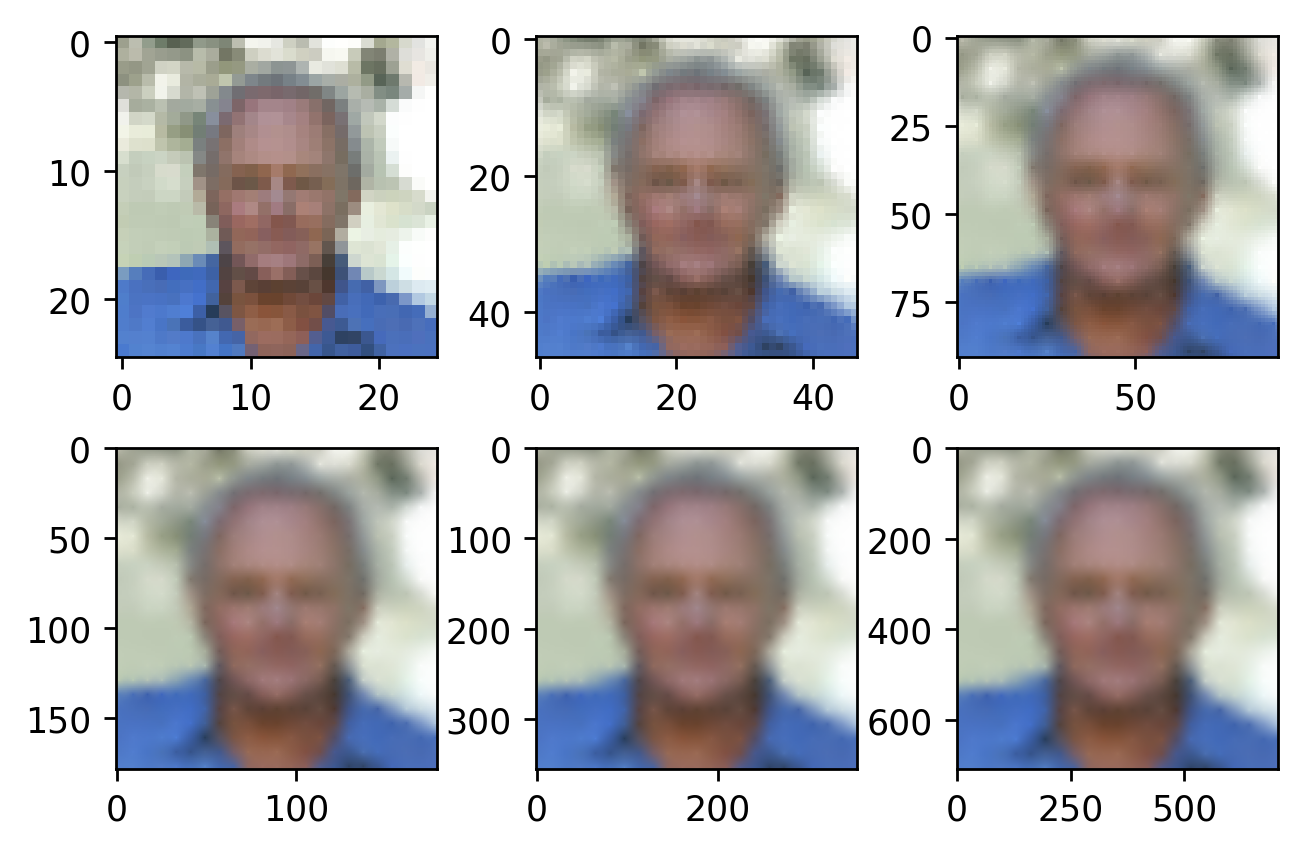

In [25]:
# standard upsampling
import numpy as np


im_rgb = pixalate_image(im, 10)

# im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


print (im_rgb.shape)

mpl.rcParams['figure.dpi'] = 250

fig, axs = plt.subplots(2, 3)
plt.subplots_adjust(wspace=.31)
# , bottom=9.09, right=9.1, top=9.1)

# ax.xaxis.set_tick_params(labelsize=5)
# using tuple unpacking for multiple Axes
# fig, (ax1, ax2) = plt.subplot(1, 2)
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplot(2, 2)

plt.subplot(2, 3, 1)
plt.imshow(im_rgb)
# plt.show()        

plt.subplot(2, 3, 2)
up_img = intropolate(im_rgb)
plt.imshow(up_img)
# plt.show()

plt.subplot(2, 3, 3)
up_img = intropolate(up_img)
plt.imshow(up_img)
# plt.show()

plt.subplot(2, 3, 4)
up_img = intropolate(up_img)
plt.imshow(up_img)
# plt.show()

plt.subplot(2, 3, 5)
up_img = intropolate(up_img)
plt.imshow(up_img)
# plt.show()

plt.subplot(2, 3, 6)
up_img = intropolate(up_img)
plt.imshow(up_img)
# plt.show()

(250, 250, 3)


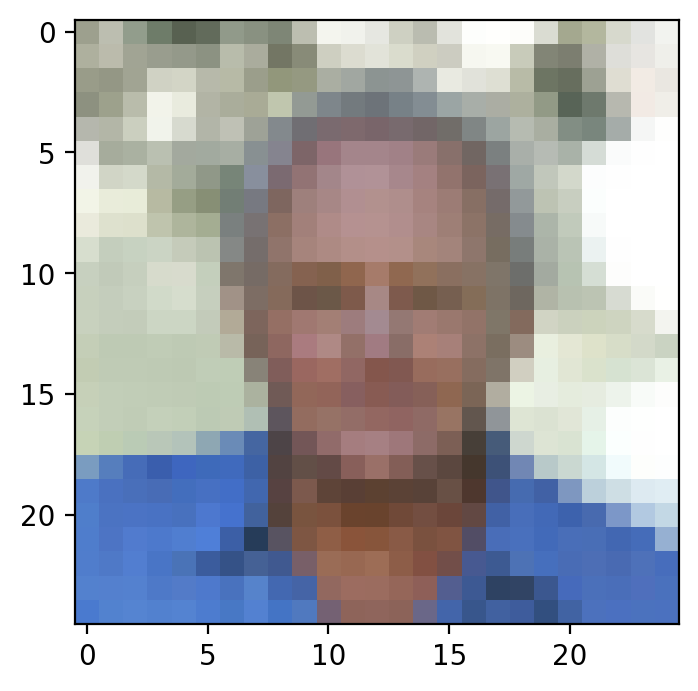

In [7]:
def pixalate_image(image, scale_percent = 50):
  width = int(image.shape[1] * scale_percent / 100)
  height = int(image.shape[0] * scale_percent / 100)
  dim = (width, height)

  small_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  
  # scale back to original size
  width = int(small_image.shape[1] * 100 / scale_percent)
  height = int(small_image.shape[0] * 100 / scale_percent)
  dim = (width, height)

  low_res_image = cv2.resize(small_image, dim, interpolation = cv2.INTER_AREA)

  return small_image


print (im.shape)
img = pixalate_image(im, 10)
plt.imshow(img)
# p = Pool(10)
# img_array = p.map(, face_images)